--- 1. Loading the Dataset ---
austin_weather.csv loaded successfully.

--- 2. Initial Data Inspection ---
First 5 rows of the dataset:
         Date  TempHighF  TempAvgF  TempLowF DewPointHighF DewPointAvgF  \
0  2013-12-21         74        60        45            67           49   
1  2013-12-22         56        48        39            43           36   
2  2013-12-23         58        45        32            31           27   
3  2013-12-24         61        46        31            36           28   
4  2013-12-25         58        50        41            44           40   

  DewPointLowF HumidityHighPercent HumidityAvgPercent HumidityLowPercent  ...  \
0           43                  93                 75                 57  ...   
1           28                  93                 68                 43  ...   
2           23                  76                 52                 27  ...   
3           21                  89                 56                 22  ...   
4       

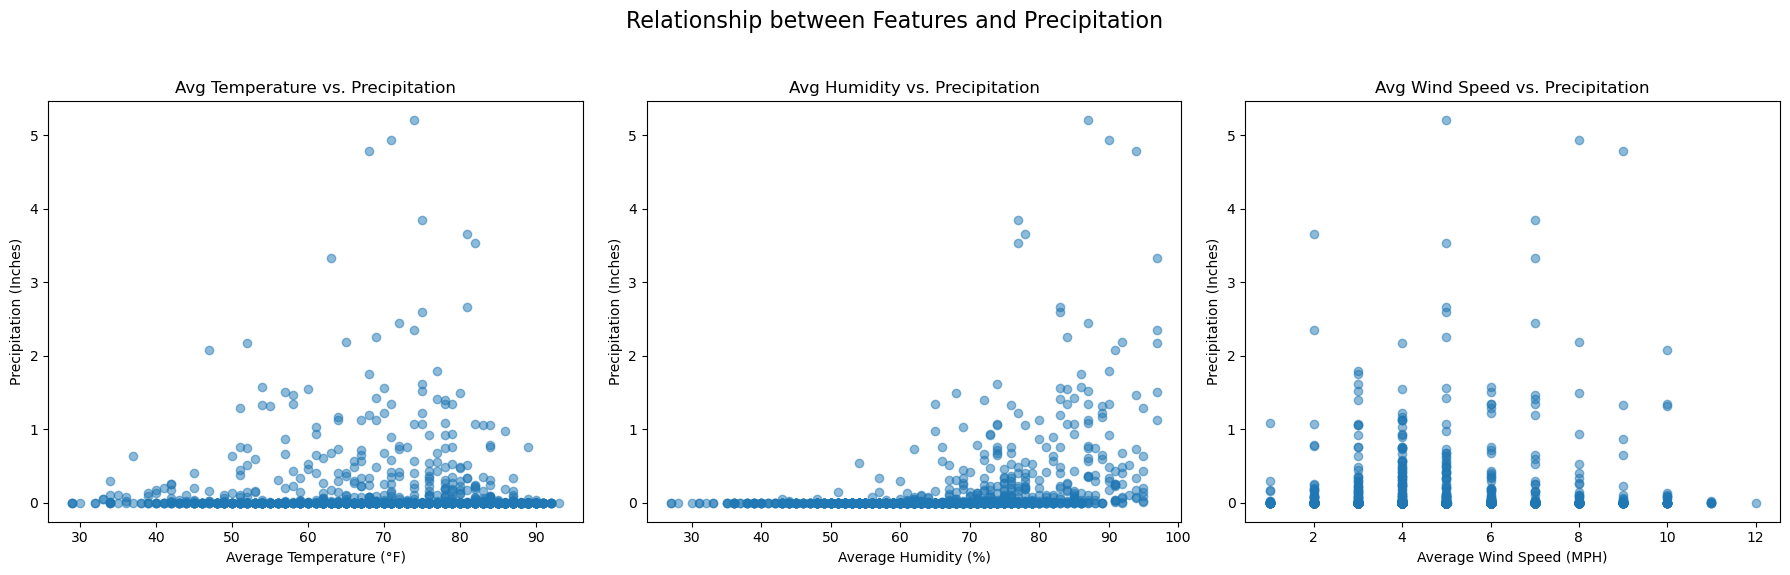


--- 5. Linear Regression Model Building ---
Training set shape: (1055, 3), (1055,)
Testing set shape: (264, 3), (264,)

Linear Regression model trained successfully.

--- 6. Model Evaluation ---
Mean Squared Error (MSE): 0.1074
R-squared (R2) Score: 0.0944

--- 7. Final Visualization: Actual vs. Predicted Values ---


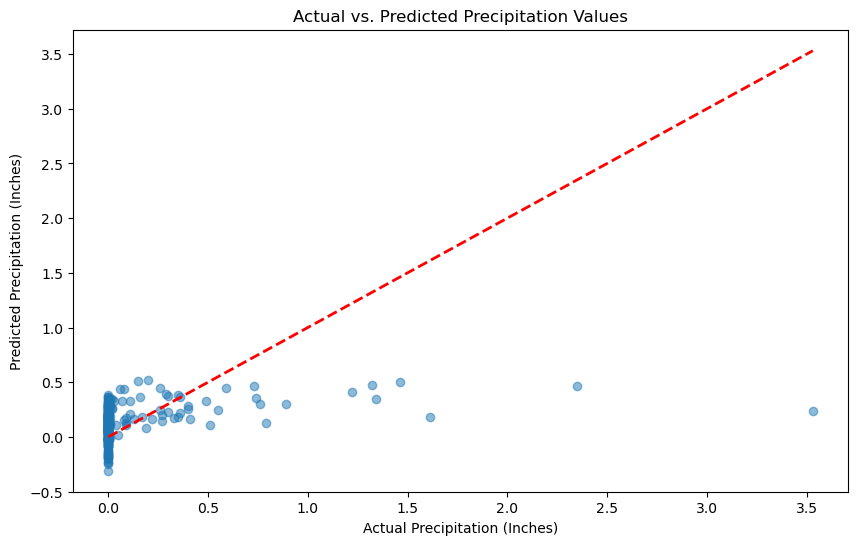


--- 8. Summary of Findings ---
Project Objective:
The primary goal was to predict rainfall (PrecipitationSumInches) using a Linear Regression model based on average temperature, humidity, and wind speed.

Key Findings:
 - The model achieved an R-squared score of 0.0944, which indicates that approximately 9.44% of the variance in precipitation can be explained by the selected features.
 - Visualizations showed a clear inverse relationship between average temperature and precipitation, and a positive relationship with average humidity. Wind speed shows a weak, albeit positive, relationship.
 - The scatter plot of actual vs. predicted values shows that the model can capture the general trend, but its predictive power is limited for very high precipitation values, which are likely influenced by other complex factors not included in the model.
 - Data preprocessing, including handling 'T' and '-' values, was crucial for preparing the dataset for machine learning.

Conclusion:
The Linear Re

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# =============================================================================
# Problem Statement: Rainfall Prediction
# =============================================================================
# This project involves handling weather data, performing preprocessing,
# applying a machine learning model (Linear Regression), and visualizing
# the relationships between weather attributes and precipitation levels.
# The goal is to predict precipitation based on weather parameters.

# --- 1. Load the Dataset ---
print("--- 1. Loading the Dataset ---")
try:
    df = pd.read_csv('austin_weather.csv')
    print("austin_weather.csv loaded successfully.")
except FileNotFoundError as e:
    print(f"Error: {e}. Please ensure the CSV file is in the same directory.")
    exit()

# --- 2. Data Inspection ---
print("\n--- 2. Initial Data Inspection ---")
print("First 5 rows of the dataset:")
print(df.head())
print("\nDataset information:")
df.info()

# --- 3. Data Cleaning and Preprocessing ---
print("\n--- 3. Data Cleaning and Preprocessing ---")

# Drop irrelevant columns as they do not provide predictive value for this task
columns_to_drop = [
    'Date', 'Events', 'SeaLevelPressureHighInches', 'SeaLevelPressureLowInches'
]
df = df.drop(columns=columns_to_drop, axis=1)

# Handle missing or special values ('T' and '-')
# 'T' in 'PrecipitationSumInches' means 'Trace', which is a minimal amount.
# We'll replace it with a small non-zero value, e.g., 0.001.
# Other columns may have '-' for missing data, which we'll replace with NaN.
df = df.replace('T', 0.001).replace('-', np.nan)

# Convert all columns to numeric type
for col in df.columns:
    df[col] = pd.to_numeric(df[col])

# Handle missing values by filling with the mean of each column
df.fillna(df.mean(), inplace=True)

# Define features (X) and target (y)
# Problem statement suggests using average temperature, humidity, and wind speed.
features = ['TempAvgF', 'HumidityAvgPercent', 'WindAvgMPH']
target = 'PrecipitationSumInches'

X = df[features]
y = df[target]

print("Data cleaned, preprocessed, and separated into features and target.")
print(f"Features (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")

# --- 4. Exploratory Data Analysis (EDA) and Visualization ---
print("\n--- 4. EDA and Visualization ---")

# Visualize the relationship between features and the target
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Relationship between Features and Precipitation', fontsize=16)

# Scatter plot: Avg Temp vs. Precipitation
axes[0].scatter(df['TempAvgF'], df['PrecipitationSumInches'], alpha=0.5)
axes[0].set_title('Avg Temperature vs. Precipitation')
axes[0].set_xlabel('Average Temperature (°F)')
axes[0].set_ylabel('Precipitation (Inches)')

# Scatter plot: Avg Humidity vs. Precipitation
axes[1].scatter(df['HumidityAvgPercent'], df['PrecipitationSumInches'], alpha=0.5)
axes[1].set_title('Avg Humidity vs. Precipitation')
axes[1].set_xlabel('Average Humidity (%)')
axes[1].set_ylabel('Precipitation (Inches)')

# Scatter plot: Avg Wind Speed vs. Precipitation
axes[2].scatter(df['WindAvgMPH'], df['PrecipitationSumInches'], alpha=0.5)
axes[2].set_title('Avg Wind Speed vs. Precipitation')
axes[2].set_xlabel('Average Wind Speed (MPH)')
axes[2].set_ylabel('Precipitation (Inches)')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# --- 5. Linear Regression Model Building ---
print("\n--- 5. Linear Regression Model Building ---")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Testing set shape: {X_test.shape}, {y_test.shape}")

# Create a Linear Regression model instance
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)
print("\nLinear Regression model trained successfully.")

# --- 6. Model Evaluation ---
print("\n--- 6. Model Evaluation ---")

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R2) Score: {r2:.4f}")

# --- 7. Final Visualization: Actual vs. Predicted Values ---
print("\n--- 7. Final Visualization: Actual vs. Predicted Values ---")
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs. Predicted Precipitation Values')
plt.xlabel('Actual Precipitation (Inches)')
plt.ylabel('Predicted Precipitation (Inches)')
plt.show()

# --- 8. Summary of Findings ---
print("\n--- 8. Summary of Findings ---")
print("Project Objective:")
print("The primary goal was to predict rainfall (PrecipitationSumInches) using a Linear Regression model based on average temperature, humidity, and wind speed.")
print("\nKey Findings:")
print(f" - The model achieved an R-squared score of {r2:.4f}, which indicates that approximately {r2*100:.2f}% of the variance in precipitation can be explained by the selected features.")
print(" - Visualizations showed a clear inverse relationship between average temperature and precipitation, and a positive relationship with average humidity. Wind speed shows a weak, albeit positive, relationship.")
print(" - The scatter plot of actual vs. predicted values shows that the model can capture the general trend, but its predictive power is limited for very high precipitation values, which are likely influenced by other complex factors not included in the model.")
print(" - Data preprocessing, including handling 'T' and '-' values, was crucial for preparing the dataset for machine learning.")
print("\nConclusion:")
print("The Linear Regression model provides a foundational understanding of the relationship between weather attributes and precipitation. For more accurate predictions, a more complex model or additional features like barometric pressure, dew point, or event types would be beneficial.")